# COGS 108 - Final Project 

# Names

- Shinuo Xu: Data cleaning, Data visualization, Statistical analysis, Data processing, Ethics and privacy

- Liza Megally: Conclusion & Discussion, Proof Read, Research, Data Visualization
- Kriti Jain: Ethics & Privacy, Background and Prior Work
- Maisha Maliha: Data Gathering, Web Scraping, Hypothesis, Data Visualization, Data Analysis, Regression Models, Predictive Models

# Group Members IDs

- A15445385
- A15753912
- A12965134
- A15102441

# Research Question






Is there a relationship between the valence,tempo, danceability, and energy of Spotify’s most popular songs and depression rates in California in the last five years?


# Background and Prior Work

Whether it is used for celebrations, form of expression or emotional outlets, music is embedded in many parts of out culture. There are factors that influence the type of music we listen to. By looking at prior research, we found that there is a relationship between what kind of music people listen to, and how they are feeling. Eric Lacourse states in his research article, “Heavy Metal Music and Adolescent Suicidal Risk,” [link](https://pdfs.semanticscholar.org/3b35/07371a5750934b135e538f783094bdc85ae2.pdf)that there was a big correlation between girls who listened to heavy metal music and sucidal risks, so we want to see if that could somehow translate over to depression rates and the type of music being heard. Moreover Peter J. Rentfrow in his article, “The Do Re Mi’s of Everyday life: The Structure and Personality Correlated of Music Preferences,” [link](https://pdfs.semanticscholar.org/1364/53addebb04b046e06a524c19fa4e891ea7ae.pdf)found out that there is a relationship between people's personality traits and the kind of music that they listen to. This relates to our topic where we see how people's behaviors and thought process affects the type of music they listen to. 

If they are a more depressed and sad emotional person, do they listen low tempo music or upbeat music? This article will help support our findings and gives a light into the correlation between personalities/their emotions and the kind of music they listen to, which will help prove the correlation between tempo and depression rates.



# Hypothesis



We hypothesize that there is an inversely positive correlation between the two datasets whereas depression rates increase, the tempo, valence, energy and dance-ability of the top 100 songs listened to on Spotify should decrease. 

Mental health is important to one’s behavioral patterns and how they cope with life challenges and depression rates in the States is on the rise as more people are prioritizing their mental health and being more vocal about it. With that in mind we expect that depression to affect one’s mood and in return affect the type of music they listen to where they would be listening to low energy and slow songs. We expect that as there is an increase in depression rates, more people would be listening to more mellow and sad-like songs and hence these songs would be part of the most streamed songs on spotify. 




# Setup

In [1]:
# Import necessary libraries

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression




/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data: Gathering 

In [0]:
#Code to get spotify data using spotify's api

#Personalized token for each user 
token=util.prompt_for_user_token(username='xxxx',scope=scope,client_id=id,client_secret=secret,redirect_uri=uri)

#Creating empty lists
>> artists=[]
>>> tracks=[]
>>> track_ids=[]
>>> popularity=[]

#Searching the year with query '2014'
>>> track_results_2014=sp.search(q='year:2014', type='track',limit=50, offset=50)

#Looping through the search result varaible and adding to our empty lists
>>> for i, t in enumerate(track_results_2014['tracks']['items']):
	artists.append(t['artists'][0]['name'])
	tracks.append(t['name'])
	track_ids.append(t['id'])
	popularity.append(t['popularity'])

  
#Creating a data set with our lists 
>>> df_2014=pd.DataFrame({'Artist':artists,'Track Name':tracks,'Track Id':track_ids,'Popularity':popularity})
>>> df_2014.head()
                Artist  ... Popularity
0        Bobby Shmurda  ...         71
1         Taylor Swift  ...         67
2        Ariana Grande  ...         75
3  5 Seconds of Summer  ...         67
4         Andy Grammer  ...         70

[5 rows x 4 columns]

#Creating new empty lists for our audio features 
>>> energy=[]
>>> tempo=[]
>>> danceability=[]
>>> valence=[]
>>> batch=df_2014['Track Id']

#Getting the audio features 
>>> results_2015=sp.audio_features(batch)

#Looping through the audio features and updating our list
>>> for i,t in enumerate(results_2015):
	energy.append(t['energy'])
	tempo.append(t['tempo'])
	danceability.append(t['danceability'])
	valence.append(t['valence'])

#Adding the audio features lists to our existing data frame
>>> df_2014=pd.DataFrame({'Artist':artists,'Track Name':tracks,'Track Id':track_ids,'Popularity':popularity, 'Energy':energy, 'Tempo':tempo, 'Danceability':danceability, 'Valence':valence})
>>> df_2014.head()
                Artist            Track Name  ... Danceability  Valence
0        Bobby Shmurda             Hot N*gga  ...        0.794    0.180
1         Taylor Swift          Shake It Off  ...        0.648    0.943
2        Ariana Grande            Break Free  ...        0.687    0.284
3  5 Seconds of Summer  She Looks So Perfect  ...        0.493    0.470
4         Andy Grammer      Honey, I'm Good.  ...        0.752    0.595

[5 rows x 8 columns]

#Finally exporting dataframe as a csv file
>>> df_2014.to_csv('ugh2014_2.csv')

SyntaxError: ignored

The same process was repeated extensively for all the other years. As spotify only limits us to 50 songs at each search, we did the whole process twice to get top 100 songs from each year in two separate dataframes. Then, we used the concat function to merge the two dataframes and get one csv file of all the 100 song in each year. We did this for the year 2012 up to 2017. The code for all the years was not put in because it is exhaustive and repetitive. 

# **Data: Description**

We got our [depression data](https://healthdata.gov/dataset/adult-depression-lghc-indicator/resource/57174298-f044-4534-ad8c-d039bc6d4837#%7B%7D) set from the official healthdata.gov website. It was a csv file with depression rates from the year 2012 to 2017. The data was divided into many criterias like depression rates among different genders, various race and ethnicity groups, different age groups, income levels, or education levels. Since, our question doesn’t look into the divided strata inside the depression rates, we only focused on the total depression rate for each year. 


Our **song data** came from the spotify api through web-scraping. We described the whole process above. The spotify data has song names, artists names, track-ID (which is the song code spotify uses to give us track analysis data), tempo, energy, and valence. Below is the description of each of these features taken from the official spotify api website. 

**Tempo: a float type variable, The overall estimated tempo of the section in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.**

**Danceability: type-float, Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.**0 is most danceable. The distribution of values for this feature look like this: 
[danceability distribution](https://https://developer.spotify.com/assets/audio/danceability.png)

**Energy: type- float variable, Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for this feature look like this:**[energy distribution](https://developer.spotify.com/assets/audio/energy.png) 

**Valence: type-float, A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The distribution of values for this feature look like this:**[valence distribtuion](https://developer.spotify.com/assets/audio/valence.png)




# **Data: Cleaning**

When cleaning **adult-depression-lghc-indicator-24.csv**, we first put all of the data into a dataframe. Then, we narrow our dataframe into a three column dataframe by dropping five columns: "Strata","Strata Name", "Weighted Frequency","Lower 95% CL" , "Upper 95% CL". 

* The reason we drop the "Strata","Strata Name" is because that we do only care overall  percent of American who get depressed, but do not care about how they get depressed. 
* The reason we drop the "Lower 95% CL" , "Upper 95% CL” is because that we do not need these two types of data to doing our data analysis. 
* The reason we drop the weighted frequency is because … 






When cleaning **music data from 2013 to 2018** (whose name is data2013.csv, data2014.csv, …, data2018.csv), we drop four column from the original dataframe:   'Unnamed: 0','Unnamed: 0.1','Track Id' , 'Artist' .
* The reason we drop them is because these information is useless for us to analyze the data . 

But we maintain the column “Track Name” due to the reason that, once we have a name, we can track our numeric data more easily. 



What's more, we rearrange all the column in our dataframes for better readability after gaining the cleaned data




---


We begin with reading the data of depression rate (adult-depression-lghc-indicator-24.csv). 

We named the origional dataframe that read from csv file as **df**


In [2]:
#Reading in data for depression rates
df = pd.read_csv("adult-depression-lghc-indicator-24.csv")
df.head()

,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,NaN,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65


After printing the head of the dataframe, we find that there are five column that need to be drop: 
*  Strata
*  Strata Name
*  Weighted Frequency
*  Lower 95% CL
*  Upper 95% CL

We named this new dataframe as **df1**



In [3]:
#Creating smaller dataframe with just total values
df1 = df.loc[df['Strata'] == "Total"]
df1 = df1.drop(columns=["Strata","Strata Name", "Weighted Frequency","Lower 95% CL" , "Upper 95% CL"])
df1

,Year,Frequency,Percent
0,2012,1920,11.74
23,2013,1689,13.08
46,2014,1309,13.30
69,2015,1848,12.92
92,2016,1645,13.77
115,2017,1550,19.04


Now, we have already got the df1 as the perfect dataframe on the depression rate.

So we begin to read in the data from 2013-2018 about the popular music. We named each dataframe using the year that the data in.(data2013, data2014 ... data2018)

Different from reading the depression rate file, we directly clean the data after reading data from each year to prevent the redundancy of code 

We have four columns that need to be dropped:
* Unnamed: 0
* Unnamed: 0.1
* Track Id
* Artist


In [4]:
#Reading in data for 2013
df_2013=pd.read_csv('data2013.csv')

#Getting Read of the columns we don't need
df_2013=df_2013.drop(columns=['Unnamed: 0','Unnamed: 0.1','Track Id' , 'Artist'])
df_2013 = df_2013[['Track Name' ,  'Popularity' ,'Danceability' , 'Energy' , 'Valence','Tempo' ]]
df_2013.head()

,Track Name,Popularity,Danceability,Energy,Valence,Tempo
0,All of Me,84,0.422,0.264,0.331,119.930
1,Play It Again,74,0.510,0.898,0.596,144.056
2,Wagon Wheel,75,0.529,0.663,0.592,148.102
3,Wake Me Up,83,0.518,0.784,0.588,124.102
4,3005,74,0.472,0.448,0.636,166.077


In [5]:
#Reading in data for 2014
df_2014=pd.read_csv('data2014.csv')

#Getting Read of the columns we don't need
df_2014=df_2014.drop(columns=['Unnamed: 0','Unnamed: 0.1','Track Id' , 'Artist'])
df_2014 = df_2014[['Track Name' ,  'Popularity' ,'Danceability' , 'Energy' , 'Valence','Tempo' ]]
df_2014.head()

,Track Name,Popularity,Danceability,Energy,Valence,Tempo
0,No Role Modelz,82,0.696,0.521,0.458,100.000
1,Wet Dreamz,78,0.504,0.705,0.584,175.483
2,Riptide,77,0.484,0.731,0.510,101.654
3,Stay With Me,83,0.418,0.420,0.184,84.094
4,Take Me to Church,75,0.566,0.664,0.437,128.945


In [6]:
#Reading in data for 2015
df_2015=pd.read_csv('data2015.csv')

#Getting Read of the columns we don't need
df_2015=df_2015.drop(columns=['Unnamed: 0','Unnamed: 0.1','Track Id' , 'Artist'])
df_2015 = df_2015[['Track Name' ,  'Popularity' ,'Danceability' , 'Energy' , 'Valence','Tempo' ]]
df_2015.head()

,Track Name,Popularity,Danceability,Energy,Valence,Tempo
0,The Less I Know The Better,82,0.640,0.74000,0.785,116.879
1,Exchange,78,0.530,0.43300,0.274,160.140
2,Brown Noise - Loopable with No Fade,76,0.000,0.00002,0.000,0.000
3,Die A Happy Man,75,0.660,0.38300,0.381,83.096
4,Tennessee Whiskey,76,0.392,0.37000,0.512,48.718


In [7]:
#Reading in data for 2016
df_2016=pd.read_csv('data2016.csv')
df_2016.columns

#Getting Read of the columns we don't need
df_2016=df_2016.drop(columns=['Unnamed: 0','Unnamed: 0.1','Track Id' , 'Artist'])
df_2016 = df_2016[['Track Name' ,  'Popularity' ,'Danceability' , 'Energy' , 'Valence','Tempo' ]]
df_2016.head()

,Track Name,Popularity,Danceability,Energy,Valence,Tempo
0,I Fall Apart,85,0.556,0.538,0.291,143.950
1,Congratulations,85,0.630,0.804,0.492,123.146
2,goosebumps,83,0.841,0.728,0.430,130.049
3,Closer,84,0.748,0.524,0.661,95.010
4,What Ifs,77,0.612,0.799,0.687,125.976


In [8]:
#Reading in data for 2017
df_2017=pd.read_csv('data2017.csv')

#Getting Read of the columns we don't need
df_2017=df_2017.drop(columns=['Unnamed: 0','Unnamed: 0.1','Track Id' , 'Artist'])
df_2017 = df_2017[['Track Name' ,  'Popularity' ,'Danceability' , 'Energy' , 'Valence','Tempo' ]]
df_2017.head()

,Track Name,Popularity,Danceability,Energy,Valence,Tempo
0,Jocelyn Flores,86,0.872,0.391,0.437,134.021
1,idontwannabeyouanymore,86,0.483,0.412,0.247,170.163
2,Ric Flair Drip (& Metro Boomin),83,0.880,0.428,0.333,100.007
3,Fuck Love (feat. Trippie Redd),84,0.797,0.533,0.329,131.036
4,Young Dumb & Broke,84,0.798,0.539,0.394,136.949


In [9]:
#Reading in data for 2018
df_2018=pd.read_csv('data2018.csv')

#Getting Read of the columns we don't need
df_2018=df_2018.drop(columns=['Unnamed: 0','Unnamed: 0.1','Track Id' , 'Artist'])
df_2018 = df_2018[['Track Name' ,  'Popularity' ,'Danceability' , 'Energy' , 'Valence','Tempo' ]]
df_2018.head()

,Track Name,Popularity,Danceability,Energy,Valence,Tempo
0,Sunflower - Spider-Man: Into the Spider-Verse,95,0.760,0.479,0.913,89.911
1,Swervin (feat. 6ix9ine),92,0.581,0.662,0.434,93.023
2,Wow.,94,0.833,0.539,0.385,99.947
3,Going Bad (feat. Drake),90,0.889,0.496,0.544,86.003
4,Murder On My Mind,90,0.759,0.730,0.740,115.007


Now, we have clean all of our data successfully. 


# Data: Visualizations

Now, all the data has been settled down. We begin to doing data visualizaton to understand the relationship between our two variables: the characteristic of popular music and the depression rate

We plot several different kinds of plots and partition them into four parts.

Firstly, we want to get the general sense about our data. Thus, we just explore our existed data in depth by ploting the following plot:
* Part One: The change of depression rate between male and female in 2013-2018
* Part Two: The trend of change in music in 2013-2018

Then, in Part Three and Four, we begin to find the relationship between music and depression rate by ploting the average of them and see whether there is any relationship. 


---



## Part One: Change of Depression Rate in 2013-2018

We first create a bar plot to see the change of depression rate between 2013-2017. 

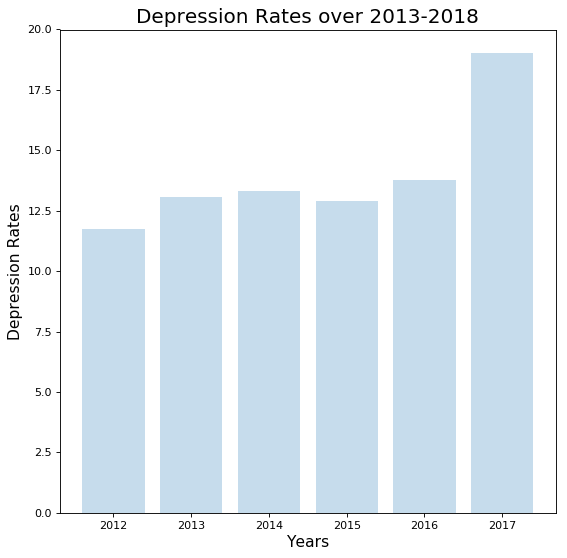

In [10]:
#Bar plot for the depression rates over the years 
depression_rate_list=[]

#Years which will be our x axis
years=[2012,2013,2014,2015,2016,2017]

#Getting the depression rates to list
depression_rate_list=df1['Percent'].tolist()

#Increasing our figure size
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

#Adding labels
plt.ylabel('Depression Rates',fontsize=14) 
plt.xlabel('Years',fontsize=14)
plt.title('Depression Rates over 2013-2018',fontsize=18)

#Plots of male and female depression rates in a stacked bar plot
p2=plt.bar(years ,depression_rate_list,align='center', alpha = 0.25)
plt.show()

From the histogram above, we can find the depression rate in California is 
* slightly increase from 2012 to 2014
* goes down a little from 2014 to 2015
* goes up extremely from 2016 to 2017

## Part Two: Trend of Change in Music in 2013-2018

We first sort each characteristic of music in every year seperately, and then try to plot them in one graph to compare them. In this way, we can know more about our music data

### The Valence of Top 100 Songs in Every Year

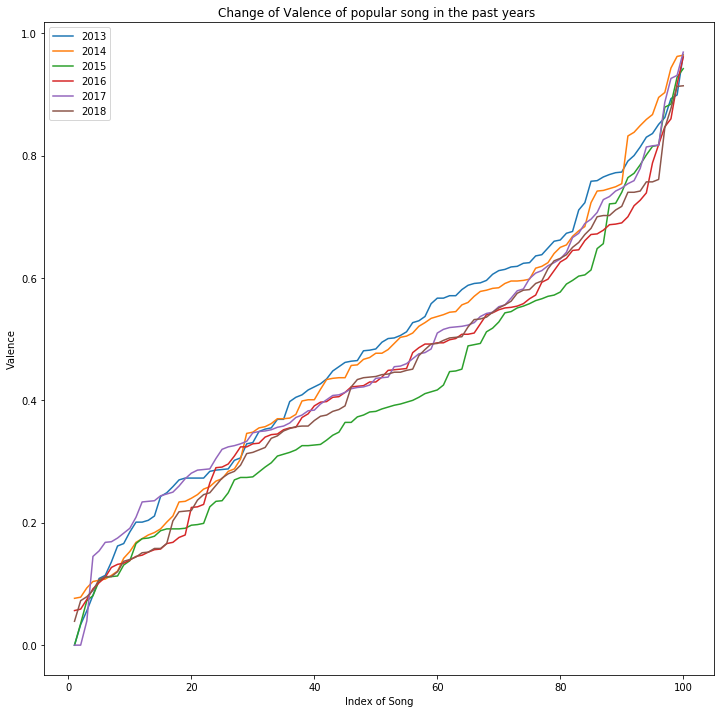

In [11]:
#We try to plot the valence of the top 100 songs in every year 


# --------------- set up x axis ------------#

# x-axis is the index of song in every year(we sort it in order by the valence ) 
x = []
for i in range(1,101):
  x.append(i)

# ------------- zoom in the plot ----------# 

figure(num=None , figsize = (12,12))

  
# ------------- doing 2013 ----------------#

# y-axis is the valence of the song in 2013
a1 = df_2013['Valence'].tolist()
a1.sort()

# start plotting 
plt.plot(x, a1, label = "2013") 


# ------------- doing 2014 ----------------#

# y-axis is the valence of the song in 2014
b = df_2014['Valence'].tolist()
b.sort()

# start plotting 
plt.plot(x, b , label = "2014") 

# ------------- doing 2015 ----------------#

# y-axis is the valence of the song in 2015 
c = df_2015['Valence'].tolist()
c.sort()

# start plotting 
plt.plot(x, c , label = "2015") 

# ------------- doing 2016 ----------------#

# y-axis is the valence of the song in 2016 
d = df_2016['Valence'].tolist()
d.sort()

# start plotting 
plt.plot(x, d , label = "2016") 

# ------------- doing 2017 ----------------#

# y-axis is the valence of the song in 2017 
e = df_2017['Valence'].tolist()
e.sort()

# start plotting 
plt.plot(x, e , label = "2017") 

# ------------- doing 2018 ----------------#

# y-axis is the valence of the song in 2018 
f = df_2018['Valence'].tolist()
f.sort()
plt.plot(x, f , label = "2018") 



# --------- show the plot ------------#

plt.xlabel('Index of Song') 
plt.ylabel('Valence') 
plt.title('Change of Valence of popular song in the past years ') 
plt.legend() 
plt.show() 

  


### The Tempo of Top 100 Songs in Every Year

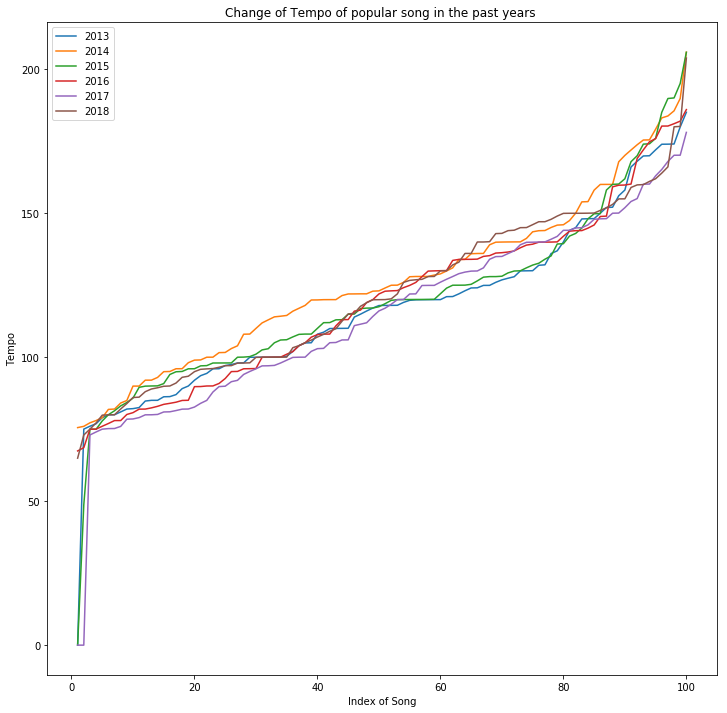

In [12]:
#We try to plot the tempo of the top 100 songs in every year 


# --------------- set up x axis ------------#

# x-axis is the index of song in every year(we sort it in order by the valence ) 
x = []
for i in range(1,101):
  x.append(i)

# ------------- zoom in the plot ----------# 

figure(num=None , figsize = (12,12))

  
# ------------- doing 2013 ----------------#

# y-axis is the Tempo of the song in 2013
a1 = df_2013['Tempo'].tolist()
a1.sort()

# start plotting 
plt.plot(x, a1, label = "2013") 


# ------------- doing 2014 ----------------#

# y-axis is the Tempo of the song in 2014
b = df_2014['Tempo'].tolist()
b.sort()

# start plotting 
plt.plot(x, b , label = "2014") 

# ------------- doing 2015 ----------------#

# y-axis is the Tempo of the song in 2015 
c = df_2015['Tempo'].tolist()
c.sort()

# start plotting 
plt.plot(x, c , label = "2015") 

# ------------- doing 2016 ----------------#

# y-axis is the Tempo of the song in 2016 
d = df_2016['Tempo'].tolist()
d.sort()

# start plotting 
plt.plot(x, d , label = "2016") 

# ------------- doing 2017 ----------------#

# y-axis is the Tempo of the song in 2017 
e = df_2017['Tempo'].tolist()
e.sort()

# start plotting 
plt.plot(x, e , label = "2017") 

# ------------- doing 2018 ----------------#

# y-axis is the Tempo of the song in 2018 
f = df_2018['Tempo'].tolist()
f.sort()
plt.plot(x, f , label = "2018") 



# --------- show the plot ------------#

plt.xlabel('Index of Song') 
plt.ylabel('Tempo') 
plt.title('Change of Tempo of popular song in the past years ') 
plt.legend() 
plt.show() 

  


### The Danceability of Top 100 Songs in Every Year

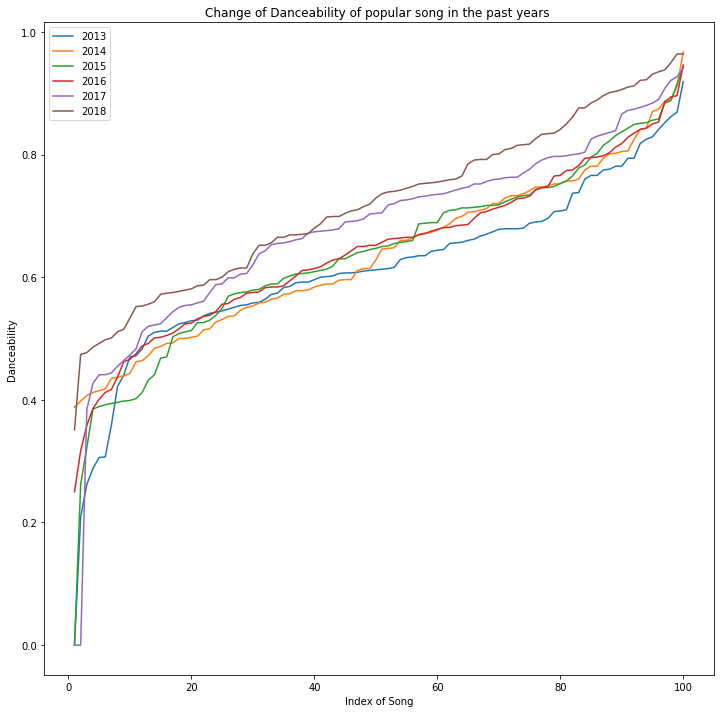

In [13]:
#We try to plot the Danceability of the top 100 songs in every year 


# --------------- set up x axis ------------#

# x-axis is the index of song in every year(we sort it in order by the valence ) 
x = []
for i in range(1,101):
  x.append(i)

# ------------- zoom in the plot ----------# 

figure(num=None , figsize = (12,12))

  
# ------------- doing 2013 ----------------#

# y-axis is the Danceability of the song in 2013
a1 = df_2013['Danceability'].tolist()
a1.sort()

# start plotting 
plt.plot(x, a1, label = "2013") 


# ------------- doing 2014 ----------------#

# y-axis is the Danceability of the song in 2014
b = df_2014['Danceability'].tolist()
b.sort()

# start plotting 
plt.plot(x, b , label = "2014") 

# ------------- doing 2015 ----------------#

# y-axis is the Danceability of the song in 2015 
c = df_2015['Danceability'].tolist()
c.sort()

# start plotting 
plt.plot(x, c , label = "2015") 

# ------------- doing 2016 ----------------#

# y-axis is the Danceability of the song in 2016 
d = df_2016['Danceability'].tolist()
d.sort()

# start plotting 
plt.plot(x, d , label = "2016") 

# ------------- doing 2017 ----------------#

# y-axis is the Danceability of the song in 2017 
e = df_2017['Danceability'].tolist()
e.sort()

# start plotting 
plt.plot(x, e , label = "2017") 

# ------------- doing 2018 ----------------#

# y-axis is the Danceability of the song in 2018 
f = df_2018['Danceability'].tolist()
f.sort()
plt.plot(x, f , label = "2018") 



# --------- show the plot ------------#

plt.xlabel('Index of Song') 
plt.ylabel('Danceability') 
plt.title('Change of Danceability of popular song in the past years ') 
plt.legend() 
plt.show() 

  


### The Energy of Top 100 Songs in Every Year

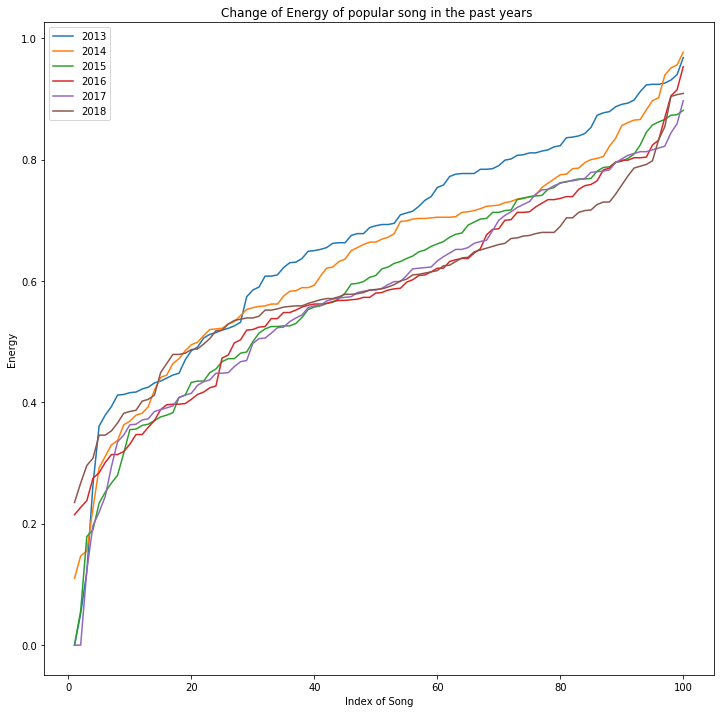

In [14]:
#We try to plot the Energy of the top 100 songs in every year 


# --------------- set up x axis ------------#

# x-axis is the index of song in every year(we sort it in order by the valence ) 
x = []
for i in range(1,101):
  x.append(i)

# ------------- zoom in the plot ----------# 

figure(num=None , figsize = (12,12))

  
# ------------- doing 2013 ----------------#

# y-axis is the Energy of the song in 2013
a1 = df_2013['Energy'].tolist()
a1.sort()

# start plotting 
plt.plot(x, a1, label = "2013") 


# ------------- doing 2014 ----------------#

# y-axis is the Energy of the song in 2014
b = df_2014['Energy'].tolist()
b.sort()

# start plotting 
plt.plot(x, b , label = "2014") 

# ------------- doing 2015 ----------------#

# y-axis is the Energy of the song in 2015 
c = df_2015['Energy'].tolist()
c.sort()

# start plotting 
plt.plot(x, c , label = "2015") 

# ------------- doing 2016 ----------------#

# y-axis is the Energy of the song in 2016 
d = df_2016['Energy'].tolist()
d.sort()

# start plotting 
plt.plot(x, d , label = "2016") 

# ------------- doing 2017 ----------------#

# y-axis is the Energy of the song in 2017 
e = df_2017['Energy'].tolist()
e.sort()

# start plotting 
plt.plot(x, e , label = "2017") 

# ------------- doing 2018 ----------------#

# y-axis is the Energy of the song in 2018 
f = df_2018['Energy'].tolist()
f.sort()
plt.plot(x, f , label = "2018") 



# --------- show the plot ------------#

plt.xlabel('Index of Song') 
plt.ylabel('Energy') 
plt.title('Change of Energy of popular song in the past years ') 
plt.legend() 
plt.show() 

  


### General Conclusion

From the four plot above, we can concludes that, from a general looking

* Valence is greatest in 2013 and smallest in 2015
* The plot of Tempo is somewhat dense and complex
* Danceability plot is really clear to see the difference between years: 2018 and 2017 is the greatest two year, while 2013 is the smallest
* Energy is kind of clear as well, the 2013, 2014, 2015 is the greatest three year, but the 2016, 2017, 2018 is relatively small


## Part Three: Finding the Relation between Songs and Depression Rate

Now we integrate the data of music and depression rate together to form a new dataframe(**df4**). This dataframe include the following information 

* the depression_rate in each year
* the mean of the music's valence / danceability / enegry / tempo in each year (calculated above)


We first try to calculate the "list of mean value" that used to form the new dataframe, it include the mean value of the following data 

  *   valence
  *   danceability
  *   energy
  *  tempo

In [15]:
#Getting the mean of valence in each year
valence_list = [ df_2013['Valence'].mean(),df_2014['Valence'].mean(),df_2015['Valence'].mean(),df_2016['Valence'].mean(),df_2017['Valence'].mean()]
print(valence_list)


#Getting the mean of danceability in each years
dance_list=[ df_2013['Danceability'].mean(),df_2014['Danceability'].mean(),df_2015['Danceability'].mean(),df_2016['Danceability'].mean(),df_2017['Danceability'].mean()]
print(dance_list)


#Getting the mean of energy in each years
energy_list=[ df_2013['Energy'].mean(),df_2014['Energy'].mean(),df_2015['Energy'].mean(),df_2016['Energy'].mean(),df_2017['Energy'].mean()]
print(energy_list)


#Getting the mean of tempo in each years
tempo_list=[ df_2013['Tempo'].mean(),df_2014['Tempo'].mean(),df_2015['Tempo'].mean(),df_2016['Tempo'].mean(),df_2017['Tempo'].mean()]
print(tempo_list)


[0.48210100000000006, 0.47144399999999997, 0.41156599999999999, 0.43679099999999998, 0.46046400000000004]
[0.61293999999999993, 0.63692999999999989, 0.63743000000000005, 0.64446999999999988, 0.67929000000000017]
[0.66362920299999995, 0.63178000000000001, 0.58759520099999996, 0.58316999999999997, 0.57788070100000011]
[116.91646999999999, 126.24982, 119.59464, 119.58673999999999, 114.50700999999999]


Then we try to get the list of depression rate in each year

In [16]:
df1.head()

,Year,Frequency,Percent
0,2012,1920,11.74
23,2013,1689,13.08
46,2014,1309,13.30
69,2015,1848,12.92
92,2016,1645,13.77


In [17]:
#make a list standing for the index of year 
year = ['2013','2014','2015','2016','2017']

#making a list of the total percentages over the years
depression_rate=df1['Percent'].tolist()


Now, we begin to create the new dataframe df4 


In [18]:

#Getting rid of the year 2012
modified_depression_rate=depression_rate[1:]

#creating a dataset with mean valence and depression rates
df4=pd.DataFrame({'Years':year,'Depression_Rate':modified_depression_rate, 'Valence': valence_list,'Danceability':dance_list , 'Energy':energy_list , 'Tempo':tempo_list})
df4

,Years,Depression_Rate,Valence,Danceability,Energy,Tempo
0,2013,13.08,0.482101,0.61294,0.663629,116.91647
1,2014,13.30,0.471444,0.63693,0.631780,126.24982
2,2015,12.92,0.411566,0.63743,0.587595,119.59464
3,2016,13.77,0.436791,0.64447,0.583170,119.58674
4,2017,19.04,0.460464,0.67929,0.577881,114.50701


## Part Four: Ploting the Relationship We Find

After getting all data in every year in part one, we try to plot the change of depression rate and valence / energy / tempo / danceability as line plots here. In this way, we can find whether there are some relationships between them.

After finding which characteric is most relevant to the depression rate, we can look through it more deeply to analyze the relationship between them.



---



However, we find our Valence, Energy, and Danceability is too small comparing to the Tempo and depression rate. 

In order to see the relationship between these variable, we change our Valence, Energy and Danceability column to a percentage values so we can get better graphs.

In [19]:
#changing values like valence and danceability to percentage values for better graph
def standardize_values(val):
  out=val
  out=out*100.00
  return out

df4['Valence'] = df4['Valence'].apply(standardize_values)
df4['Danceability'] = df4['Danceability'].apply(standardize_values)
df4['Energy'] = df4['Energy'].apply(standardize_values)
df4

,Years,Depression_Rate,Valence,Danceability,Energy,Tempo
0,2013,13.08,48.2101,61.294,66.36292,116.91647
1,2014,13.30,47.1444,63.693,63.17800,126.24982
2,2015,12.92,41.1566,63.743,58.75952,119.59464
3,2016,13.77,43.6791,64.447,58.31700,119.58674
4,2017,19.04,46.0464,67.929,57.78807,114.50701


Now, we begin to plot the relationship between our variables.

### Relation between Valence and Depression Rate

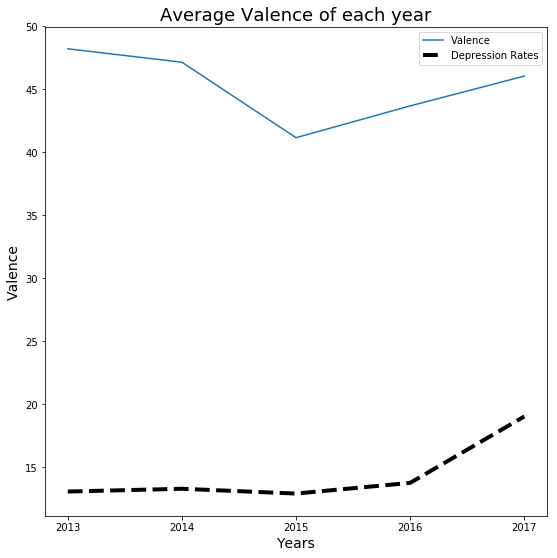

In [20]:
#Line plot for the average Valence of year

#years which will be our x-axis
x = ['2013','2014','2015','2016','2017']

#increasing figure size
figure(num=None, figsize=(9, 9))

#adding labels
plt.xlabel('Years',fontsize=14);
plt.ylabel('Valence',fontsize=14);

plt.title('Average Valence of each year',fontsize=18);

#plotting
plt.plot(x,df4['Valence'])
plt.plot(df4['Years'], df4['Depression_Rate'], '--k', linewidth=4, label='Depression Rates');
plt.legend()

### Relation between Energy and Depression Rate

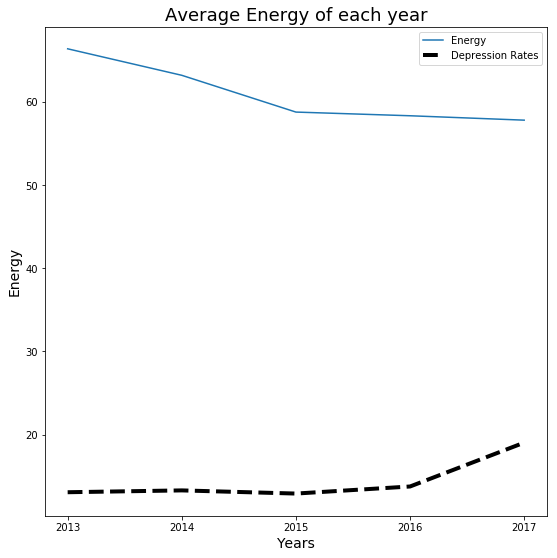

In [21]:
#Line plot for the average energy of year

#years which will be our x-axis
x = ['2013','2014','2015','2016','2017']

#increasing figure size
figure(num=None, figsize=(9, 9))

#adding labels
plt.xlabel('Years',fontsize=14);
plt.ylabel('Energy',fontsize=14);
plt.title('Average Energy of each year',fontsize=18);

#plotting
plt.plot(x,df4['Energy'])
plt.plot(df4['Years'], df4['Depression_Rate'], '--k', linewidth=4, label='Depression Rates');
plt.legend()

### Relation between Tempo and Depression Rate

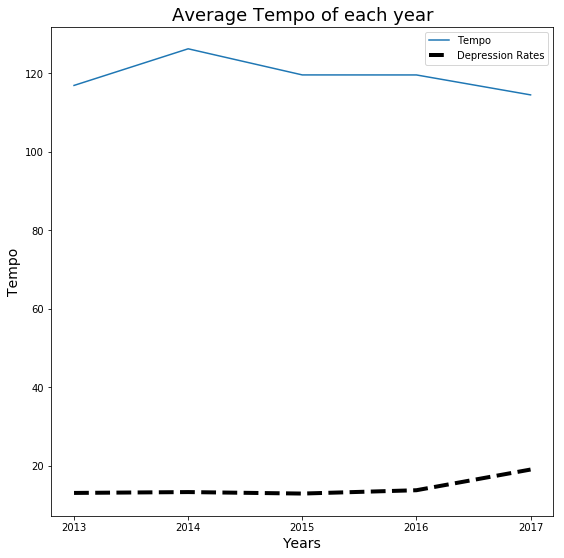

In [22]:
#Line plot for the average tempo of year

#years which will be our x-axis
x = ['2013','2014','2015','2016','2017']

#increasing figure size
figure(num=None, figsize=(9, 9))

#adding labels
plt.xlabel('Years',fontsize=14);
plt.ylabel('Tempo',fontsize=14);
plt.title('Average Tempo of each year',fontsize=18);

#plotting
plt.plot(x,df4['Tempo'])
plt.plot(df4['Years'], df4['Depression_Rate'], '--k', linewidth=4, label='Depression Rates');
plt.legend()

### Relation between Danceability and Depression Rate

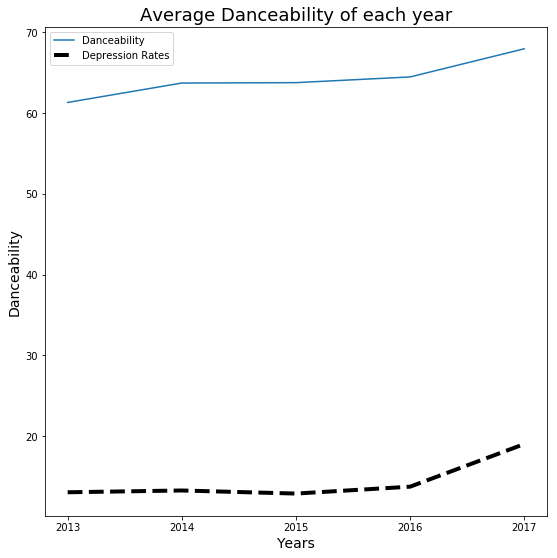

In [23]:
#Line plot for the average danceability of year

#years which will be our x-axis
x = ['2013','2014','2015','2016','2017']

#increasing figure size
figure(num=None, figsize=(9, 9))

#adding labels
plt.xlabel('Years',fontsize=14);
plt.ylabel('Danceability',fontsize=14);
plt.title('Average Danceability of each year',fontsize=18);

#plotting
plt.plot(x,df4['Danceability'])
plt.plot(df4['Years'], df4['Depression_Rate'], '--k', linewidth=4, label='Depression Rates');
plt.legend()

### General Conclusion for Data Visualization

As the graph shows, we can make a general conclusion: the average depression rate are 
*  relatively proportion to the **danceability** 
*  relatively inversely proportion to the **energy** 

For the relationship between depression rate and tempo / valence, it is a little complex. 

In the following data analysis part, we will deal with the relationship in depth 

# Data: Linear Regression and Analysis 

## Linear Regression

In this section we use the corr function of data to see the correalation of depression rates with danceability and valence at a glance. Then we use patsy's OLS function to do linear regression on our data. We later plot these results for better analysis. 

In [93]:
df4.corr()

,Depression_Rate,Valence,Danceability,Energy,Tempo
Depression_Rate,1.000000,0.160953,0.892770,-0.497382,-0.598985
Valence,0.160953,1.000000,-0.188250,0.726061,0.012794
Danceability,0.892770,-0.188250,1.000000,-0.790710,-0.346263
Energy,-0.497382,0.726061,-0.790710,1.000000,0.249074
Tempo,-0.598985,0.012794,-0.346263,0.249074,1.000000


We notice that depression rates have a very low corelation with valence but a greater coorelation with danceability. Energy and Tempo have negative correlation with depression rates so we will go ahead with our regression with these two characterstics. Since, we are looking for a negative correlation. 

In [25]:
#To install statsmodel manually from git
#UNCOMMENT ONLY WHILE RUNNING IN COLLABORATORY
#!pip install --upgrade Cython
#!pip install --upgrade git+https://github.com/statsmodels/statsmodels

In [94]:
#Running the model of Depression Rates and Energy
outcome, predictors = patsy.dmatrices('Depression_Rate~ Energy', df4)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Depression_Rate   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9861
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.394
Time:                        18:40:51   Log-Likelihood:                -10.606
No. Observations:                   5   AIC:                             25.21
Df Residuals:                       3   BIC:                             24.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.4801     21.238      1.671      0.1

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


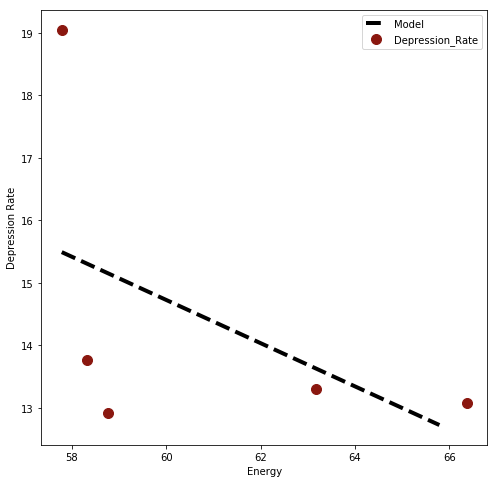

In [95]:
## Plot the model fit line
x=df4['Energy']
y=df4['Depression_Rate']
figure(num=None , figsize = (8,8))

plt.scatter(x,y, s=100)
plt.plot(figsize=(14,10))

# Generate and plot the model fit line
xs = np.arange(df4['Energy'].min(), df4['Energy'].max())
ys = res.params[1] * xs + res.params[0]
plt.plot(xs, ys, '--k', linewidth=4, label='Model');
plt.xlabel('Energy')
plt.ylabel('Depression Rate')
plt.legend();

This simple scatter plot with our model line drawn shows us a more accurate representation of our correlation between Energy and Depression Rate. From our summary we can see our R-value is negative (as expected) but very small.

In [96]:
# run model for Depression rate and Tempo
outcome, predictors = patsy.dmatrices('Depression_Rate~ Tempo', df4)
mod1 = sm.OLS(outcome, predictors)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:        Depression_Rate   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1.679
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.286
Time:                        18:41:13   Log-Likelihood:                -10.206
No. Observations:                   5   AIC:                             24.41
Df Residuals:                       3   BIC:                             23.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.7875     32.717      1.736      0.1

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


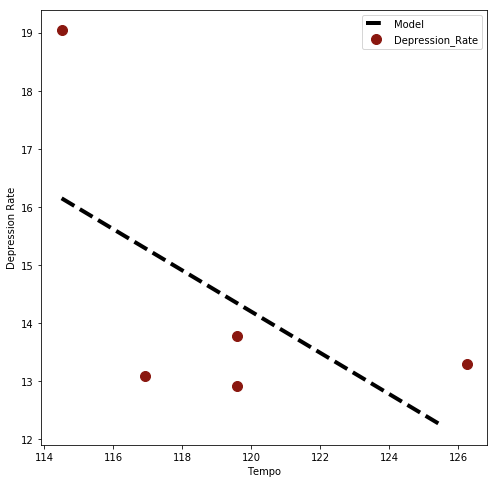

In [97]:
#Finding correlation with Tempo and depression rate
## Plot the model fit line
x1=df4['Tempo']
y1=df4['Depression_Rate']
figure(num=None , figsize = (8,8))

plt.scatter(x1,y1, s=100)
plt.plot(figsize=(14,10))

# Generate and plot the model fit line
xs = np.arange(df4['Tempo'].min(), df4['Tempo'].max())
ys = res1.params[1] * xs + res1.params[0]
plt.plot(xs, ys, '--k', linewidth=4, label='Model');
plt.xlabel('Tempo')
plt.ylabel('Depression Rate')
plt.legend();



As it is clear from the plot and our r values,Tempo also has an inverse correlation with depression rates. Both our correlation models show negative correlation.

Now, we will do linear regression on our data. We do it twice, once for predicting depression rates from energy and another time to predict depression rates from energy. This will be our last analysis step to see which feature from our music analysis can do a better job at predicting depression rates. Thus, having a better correlation with depression rates in California 

In [98]:
#Training data using Energy and depression rates 
X = df4[['Energy']]
y = df4[['Depression_Rate']]


In [99]:

#Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23333)
model=LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(predictions)

[[ 14.08144197]
 [ 16.13319607]]


In [100]:
#Printing the summary of our model 
regression_score = model.score(X_test, y_test)
intercept = model.intercept_[0]
coef = model.coef_[0][0]
regression_model_mse = mean_squared_error(predictions, y_test)
print("Regression Score of our model",regression_score)
print("Coefficient of our model",coef)
print("Intercept of our model",intercept)
print("The mean squared error of our model:",regression_model_mse)

Regression Score of our model -55.0918717014
Coefficient of our model -0.422084777436
Intercept of our model 40.7479140384
The mean squared error of our model: 3.09767361471


We get a negative correlation coefficient for our model like we expected 

In [101]:
#Applying the prediction model and adding a new column to our dataset for comparison
df4['Predicted Depression Rates With Energy']=df4['Energy'].apply(model.predict)
df4.head()


,Years,Depression_Rate,Valence,Danceability,Energy,Tempo,Predicted Depression Rates With Energy,Predicted Depression Rates With Tempo
0,2013,13.08,48.2101,61.294,66.36292,116.91647,[[12.7371355935]],[[13.363627194]]
1,2014,13.30,47.1444,63.693,63.17800,126.24982,[[14.0814419695]],[[13.2994958372]]
2,2015,12.92,41.1566,63.743,58.75952,119.59464,[[15.9464150747]],[[13.3452249401]]
3,2016,13.77,43.6791,64.447,58.31700,119.58674,[[16.1331960726]],[[13.3452792227]]
4,2017,19.04,46.0464,67.929,57.78807,114.50701,[[16.3564493318]],[[13.3801830864]]


Text(0.5, 1.0, 'Linear Regression Model')

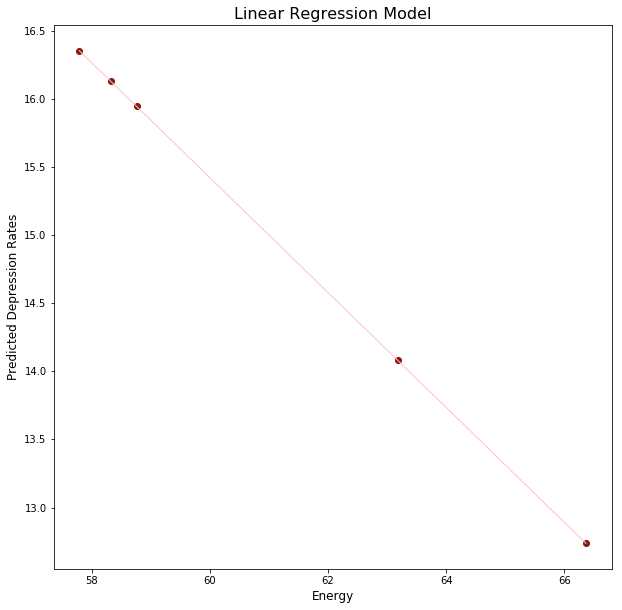

In [102]:
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
x1=df4['Energy']
y1=df4['Predicted Depression Rates With Energy']
figure(num=None , figsize = (10,10))

#Plot to show the regression model
plt.scatter(x1,y1)
plt.plot(x1, coef* x1 + intercept,color='pink', lw=1)
plt.xlabel('Energy',fontsize=12)
plt.ylabel('Predicted Depression Rates',fontsize=12)
plt.title('Linear Regression Model', fontsize=16)

Our predictive analysis model is shown through this simple line plot after doing linear regression.

In [109]:
#Training regrssion model for test with tempo
X1=df4[['Tempo']]
y1=df4[['Depression_Rate']]

In [110]:
#Now we will do the same linear regression with tempo and see if that gives us a better model 

#Training regrssion model for test with tempo
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.23333)
model_tempo=LinearRegression()
model_tempo.fit(X_train,y_train)
predictions=model_tempo.predict(X_test)
print(predictions)

[[ 13.38018309]
 [ 13.36362719]]


In [111]:
#Printing the summary for our tempo model
regression_score = model_tempo.score(X_test, y_test)
intercept = model_tempo.intercept_[0]
coef = model_tempo.coef_[0][0]
regression_model_mse = mean_squared_error(predictions, y_test)
print("Regression Score of our model",regression_score)
print("Coefficient of our model",coef)
print("Intercept of our model",intercept)
print("The mean squared error of our model:",regression_model_mse)

Regression Score of our model -0.808137689768
Coefficient of our model -0.00687120452529
Intercept of our model 14.1669841717
The mean squared error of our model: 16.0569859402


The coefficient of our model also gives negative regression score and a pretty low mean square error.

In [112]:
#Applying the prediction model and adding a new column to our dataset for comparison
df4['Predicted Depression Rates With Tempo']=df4['Tempo'].apply(model_dance.predict)
df4.head()

,Years,Depression_Rate,Valence,Danceability,Energy,Tempo,Predicted Depression Rates With Energy,Predicted Depression Rates With Tempo
0,2013,13.08,48.2101,61.294,66.36292,116.91647,[[12.7371355935]],[[13.363627194]]
1,2014,13.30,47.1444,63.693,63.17800,126.24982,[[14.0814419695]],[[13.2994958372]]
2,2015,12.92,41.1566,63.743,58.75952,119.59464,[[15.9464150747]],[[13.3452249401]]
3,2016,13.77,43.6791,64.447,58.31700,119.58674,[[16.1331960726]],[[13.3452792227]]
4,2017,19.04,46.0464,67.929,57.78807,114.50701,[[16.3564493318]],[[13.3801830864]]


Text(0.5, 1.0, 'Linear Regression Model')

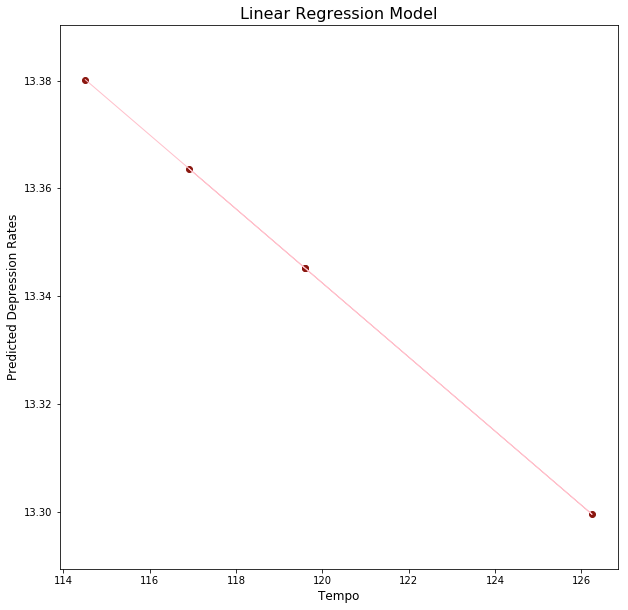

In [113]:
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
x1=df4['Tempo']
y1=df4['Predicted Depression Rates With Tempo']
figure(num=None , figsize = (10,10))

#Plot to show the regression model
plt.scatter(x1,y1)
plt.plot(x1, coef* x1 + intercept,color='pink', lw=1)
plt.xlabel('Tempo',fontsize=12)
plt.ylabel('Predicted Depression Rates',fontsize=12)
plt.title('Linear Regression Model', fontsize=16)

## Data Analysis Results


To test how accurate our prediction model is, we will use it to predict depression rate for the year 2018. We already have the webscraped data of 2018 to work on.

In [114]:
#Model prediction for the year 2018
mean_energy_2018=df_2018['Energy'].mean()
mean_tempo_2018=df_2018['Tempo'].mean()
mean_energy_2018=standardize_values(mean_energy_2018)
depression_2018_tempo=model_dance.predict(mean_tempo_2018)
depression_2018_energy=model.predict(mean_energy_2018)
print("The predicted depression rate for 2018 from energy data is: ",depression_2018_energy)
print("The predicted depression rate for 2018 from tempo data is: ",depression_2018_tempo)

The predicted depression rate for 2018 from energy data is:  [[ 15.80945705]]
The predicted depression rate for 2018 from tempo data is:  [[ 13.33309225]]


As we can see from our predictive model, the energy model gives us a good estimate of depression rates as it shows a definite increase. This fits our hypothesis. But, the tempo model does not really show much difference in depression rates.

From our analysis, the regression models show that there is indeed an inverse correlation between depression rates with energy, and tempo.
Our predictive model helps us predict depression rates of each year from the mean tempo or energy of that year. We can also see in our model that the year with the highest depression rate is the year which has lower average tempo and energy. 
Having said that, the year 2017 also seems like an outlier in out data as it has a rate which increases a lot from the other years.

# Ethics & Privacy

We obtained the songs datasets for each year from Spotify’s own API, which is accessible to the public so we had permission to use it; we just had to agree to their terms and conditions. For our mental health data, we got the data from healthdata.gov which was a public database so it was also accessible for public use and it was okay for us to use it.There were no privacy concerns we had to deal with in specific, but we made sure to be credible and not alter the data at all. This ensured that the data we were using was authentic and credible, and did not invade anyone's privacy. 

There are some potential biases from the actual databases however. For one, we are unware of how healthdata.gov obtained their data. We do not know if there were any biases involved in their data since we do not have adequate information on how they did their interviews and gathered their data, which could influence any biases in our analysis and results. Since we do not have enought information on their dataset and study, we are not completely confident in the ethical grounds behind it because mental health is a private topic and we are not sure if they were given permission by the people they interviewed for it to be made part of a dataset visible to the public. The dataset did not reveal any personal information however, and everything was kept anonymous. We also were concerned about confidnetiality issues when it comes to mental health illnesses and the fact that not everyone is open to talk about their mental health and so not many people even know that they have mental health issues, so the numbers could be not truly reflective of the community’s mental health as a whole. 

We created some biasedness in our data when we cleaned our data and only took the total percentage of depression from each year. The whole dataset had more criterias and we only focused on the one we needed.

We can claim that we tried to follow all ethics and privacy rules but we are also aware that no data is bias free and we create that biasedness in our data when we clean it. 





# Conclusion & Discussion

This project focused on analyzing the relationship between the top 100 Spotify songs and depression rates in California over the past five years. In order to assess the songs in quantifiable measures, we analyzed the change in valence, energy and dance-ability of the top songs in each year. We then compared the general trend of each of the three mechanical audio features to the change in depression rates over the past 5 years. We hypothesized that there is an negative correlation between the two datasets whereas depression rates increase, the tempo, valence, energy and dance-ability of the top 100 songs listened to on Spotify should decrease. However based on our data analysis, energy has a relatively negative correlation with depression rates and so does tempo. But valence has a postive but low correlation with depression rates, while dance-ability has a high positive correlation with depression rates over the analyzed 5 years in California. 

The varying correlations can be due to the fact that each audio feature plays a different role in a song and that depression abnormally affects the individual’s behavioral response to stimuli such as music. For example, study shows that depression “flattens the emotional landscape” and depressed individuals exhibit little reactivity to emotion and emotional context  ([link](http://psychology.usf.edu/faculty/data/jrottenberg/cd.pdf)) and since valence refers to the emotion/mood of a song, this can possibly help explain the low positve correlation between valence and depression rates. . However, a dance-ability’s positive correlation with depression rates can imply that songs with high dance-ability might play a role in the type of music being listened to since dancing and physical exercise releases endorphins (feel-good chemicals) that reduce stress and boost mood. Energy and tempo have a negative correlation with depression rates which agrees with our hypothesis implying that there is some type of a relationship whereas depression rates increase, the energy and tempo of the top songs listened to decreases. To see why only tempo and energy had the correlation which we were expecting we did some research on what song tempo means. From one article, we found that "The tempo of a song generally correlates with the kind of mood a song will set in a video or any project that utilizes music to invoke a specific feeling in the audience. The higher the BPM, the faster the song, which is great for scenes that are joyful, exciting, or need to move quickly or intensely. Meanwhile, a lower BPM means the song is slower, which is fitting scenes that are sad, dramatic or romantic." This explains why lower tempo years saw an increase in depression rates.  

Limitations to our work include limited availability of depression data in California where we were only able to find data for the past five which affected the accuracy of our data analysis since we did not have adequate data to rely on. This can tie back with the confidentiality issue revolving mental illness. Another Limitation was that the music data sets available were for Spotify which might not have been a big enough scope like billboard’s so not necessarily all of the individuals reported in the depression dataset listened to Spotify music. Due to time constraints we could only work on data from last 5 years, if we had more time we could have done the analysis on the last 15/20 years. Another factor is that we only used 100 songs from each year as scraping data from spotify is a time consuming process.

Our work can hopefully encourage future research and analysis on the relationship between music and depression at a much bigger scale and possible non-drug treatments for mental health illnesses such as music and dance therapy. 